# INTRODUCTION

In this project, I aim to explore the relationship between a country's economic performance and the life expectancy of its population. Specifically, I will examine whether countries with higher GDP tend to have higher life expectancy.

The dataset includes GDP and life expectancy data from six nations over a span of several years. After cleaning and preparing the data, I will analyze trends over time, compare countries, and visualize possible correlations between the two variables.

Some of the key questions I will address include:

- Has life expectancy improved over time in each country?

- Has GDP shown consistent growth across the nations?

- Is there a visible relationship between GDP and life expectancy?

- What is the average life expectancy in these countries?

- What does the distribution of life expectancy look like?

Data Sources:

- GDP: World Bank and OECD data

- Life Expectancy: World Health Organization (WHO)

# Data Loading and Initial Cleaning
In this step, we:

Loaded the dataset using pandas.read_csv.

Inspected the first few rows with .head() and basic statistics with .describe().

Renamed the "Life expectancy at birth (years)" column to a shorter "LE" for easier handling.

Checked the structure and content of the data with .info(), and explored the unique countries and years in the dataset.

Replaced "United States of America" with the shorter "USA" for consistency and simplicity in plots.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("all_data.csv")

print(df.head())

print(df.describe())

df = df.rename({"Life expectancy at birth (years)":"LE"}, axis = "columns")

print(df.info())

print(df.Country.unique())

print(df.Year.unique())

df["Country"] = df["Country"].replace("United States of America", "USA")

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13
<class 'panda

# Life Expectancy Trends Over Time
In this visualization:

We plotted life expectancy trends for each country using a line plot.

A dashed black line represents the average life expectancy across all countries for each year.

This allows us to compare each country’s trajectory with the global average and observe overall improvements or stagnations.



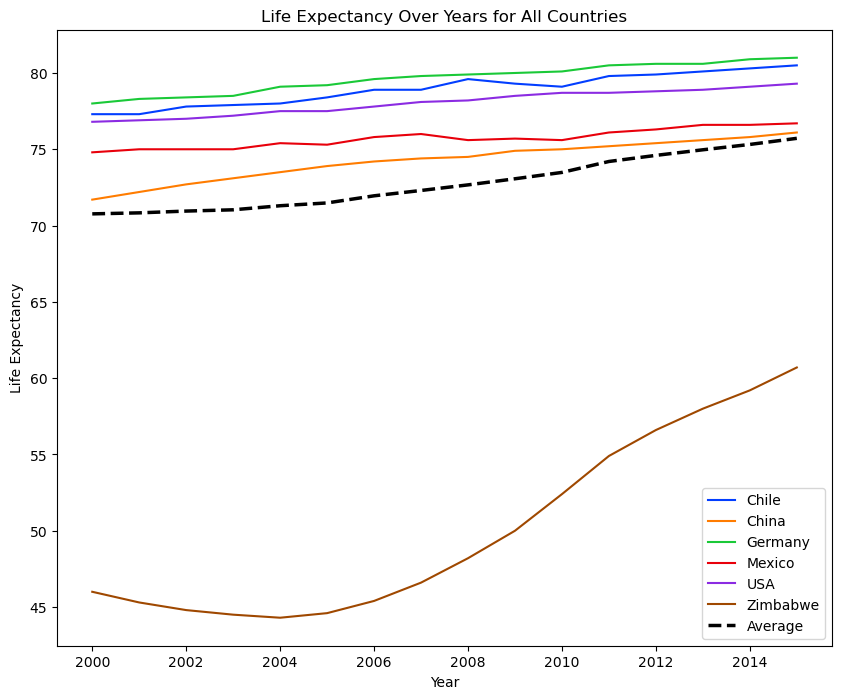

<Figure size 640x480 with 0 Axes>

In [8]:
mean_life = df.groupby("Year")["LE"].mean().reset_index()
mean_GDP = df.groupby("Year")["GDP"].mean().reset_index()

plt.figure(figsize=(10,8))
sns.lineplot(x = "Year", y = "LE", data = df, hue = "Country", palette = "bright")
sns.lineplot(x = "Year", y ="LE", data = mean_life, color = "black", label = "Average", linewidth = 2.5, linestyle = "--")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy Over Years for All Countries")
plt.legend(loc = "lower right")
plt.show()
plt.clf()


# GDP Trends Over Time
In this line plot:

We visualized GDP changes over time for each country in the dataset.

The dashed black line shows the average GDP across all countries for each year.

This chart helps us compare economic growth trajectories of different countries and identify common trends or deviations from the global average.



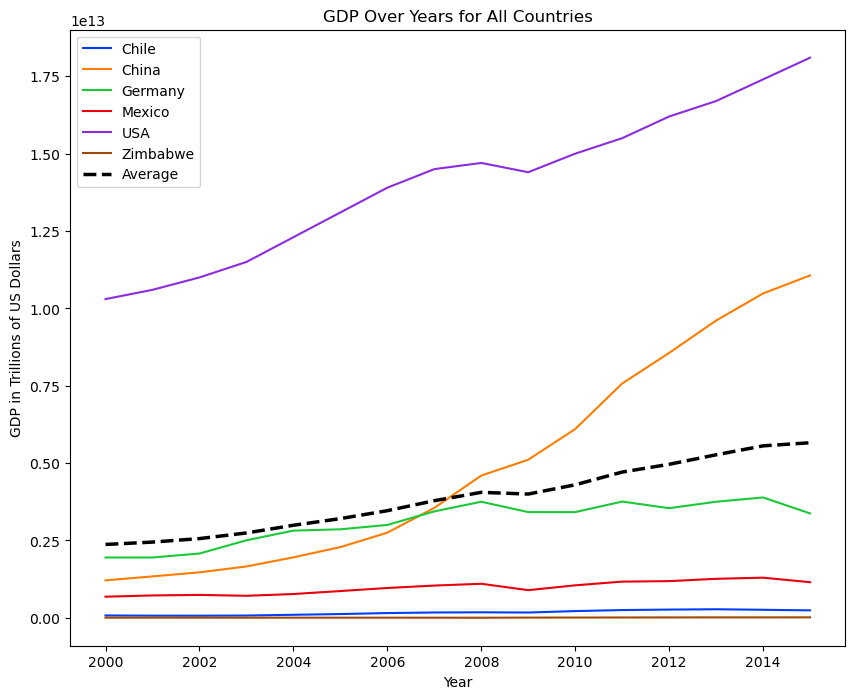

<Figure size 640x480 with 0 Axes>

In [9]:
plt.figure(figsize=(10,8))
sns.lineplot(x = "Year", y = "GDP", data = df, hue = "Country", palette = "bright")
sns.lineplot(x = "Year", y = "GDP", data = mean_GDP, color = "black", label = "Average", linewidth = 2.5, linestyle = "--")
plt.xlabel("Year")
plt.ylabel("GDP in Trillions of US Dollars")
plt.title("GDP Over Years for All Countries")
plt.legend(loc = "upper left")
plt.show()
plt.clf()

# Life Expectancy Distribution
This histogram displays the distribution of life expectancy across all countries and years in the dataset.

The values are concentrated between 70 and 80 years, indicating that most countries have similar life expectancy values.

The distribution is slightly left-skewed, meaning fewer countries have significantly lower life expectancy.

# GDP Distribution
This histogram shows the distribution of GDP values (in trillions of US dollars) across all observations.

The distribution is heavily right-skewed, with most countries having lower GDP and a few countries having very high GDP values.

This indicates significant economic disparity among the countries.

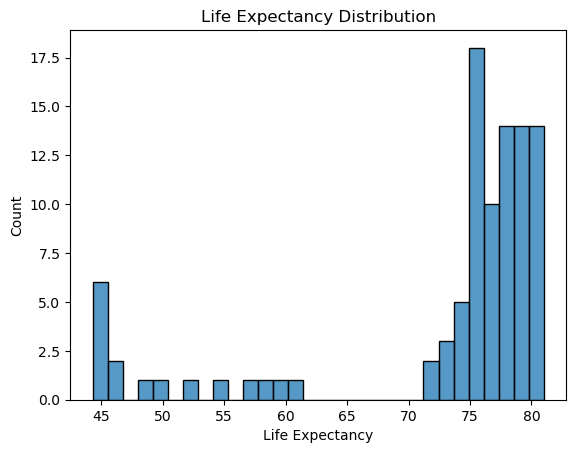

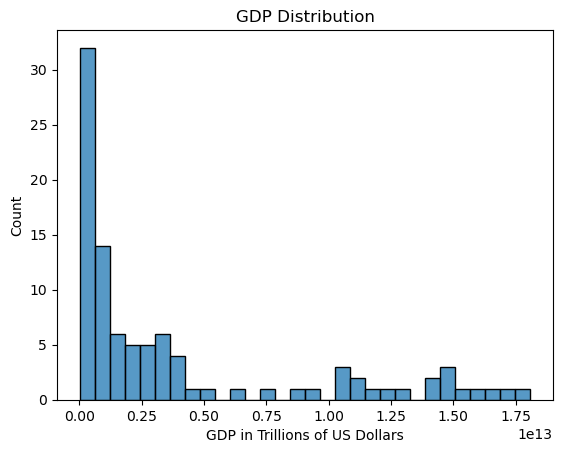

<Figure size 640x480 with 0 Axes>

In [17]:
sns.histplot(df["LE"], bins = 30)
plt.xlabel("Life Expectancy")
plt.title("Life Expectancy Distribution")
plt.show()
plt.clf()

sns.histplot(df["GDP"], bins = 30)
plt.title("GDP Distribution")
plt.xlabel("GDP in Trillions of US Dollars")
plt.show()
plt.clf()

# Average Life Expectancy and GDP by Country
The first bar plot presents the average life expectancy for each country over the years. The second bar plot shows the average GDP for each country.

These plots provide a clear visual comparison between countries.

We can observe that countries like Germany and Chile have higher life expectancy on average, while Zimbabwe has the lowest.

In terms of GDP, the USA has a significantly higher average than the other countries, highlighting economic disparity.

These insights help contextualize the relationship between health outcomes and economic performance.

The Mean Life Expectancy in Chile : 78.94375
The Mean Life Expectancy in China : 74.26249999999999
The Mean Life Expectancy in Germany : 79.65625
The Mean Life Expectancy in Mexico : 75.71875
The Mean Life Expectancy in USA : 78.0625
The Mean Life Expectancy in Zimbabwe : 50.09375


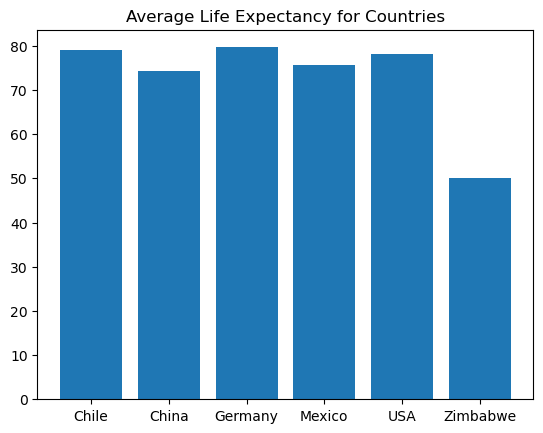

The Mean GDP in Chile : 169788845015.3125
The Mean GDP in China : 4957713750000.0
The Mean GDP in Germany : 3094775625000.0
The Mean GDP in Mexico : 976650625000.0
The Mean GDP in USA : 14075000000000.0
The Mean GDP in Zimbabwe : 9062579595.0625


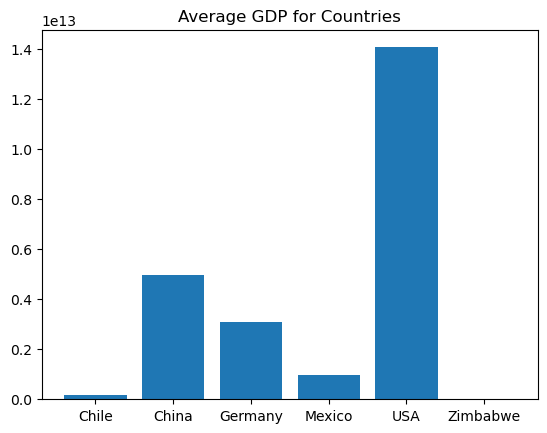

<Figure size 640x480 with 0 Axes>

In [20]:
country_means = []

for i in df["Country"].unique():
    print("The Mean Life Expectancy in {} :".format(i), df[df["Country"] == i]["LE"].mean()) 
    country_means.append(df[df["Country"] == i]["LE"].mean())

plt.bar(df["Country"].unique(), country_means)
plt.title("Average Life Expectancy for Countries")
plt.show()
plt.clf()


country_gdp_mean = []

for i in df["Country"].unique():
    print("The Mean GDP in {} :".format(i), df[df["Country"] == i]["GDP"].mean()) 
    country_gdp_mean.append(df[df["Country"] == i]["GDP"].mean())

plt.bar(df["Country"].unique(), country_gdp_mean)
plt.title("Average GDP for Countries")
plt.show()
plt.clf()

#  Life Expectancy Trends Over Time (With Average Across All Countries)
This figure displays life expectancy trends over the years for each of the six countries individually. Each subplot represents a single country:

- The colored line shows that country's life expectancy trend.

- The black dashed line represents the average life expectancy across all countries for comparison.

Most countries demonstrate an overall upward trend, indicating improvements in healthcare systems, quality of life, and socio-economic conditions over time.

Interestingly, all countries are seen to converge toward the average trend over the years:

- For Zimbabwe, this is a positive development, as its life expectancy started well below the average but has shown substantial growth, moving closer to the global trend.

- In contrast, other countries like Germany, USA, and Chile, which initially had life expectancies above the average, are now seen to approach the average line slightly. This may indicate that while improvements continue, the pace may have stabilized or slowed.

The average line provides a useful benchmark to observe how each country's life expectancy compares to and evolves with the global trend.

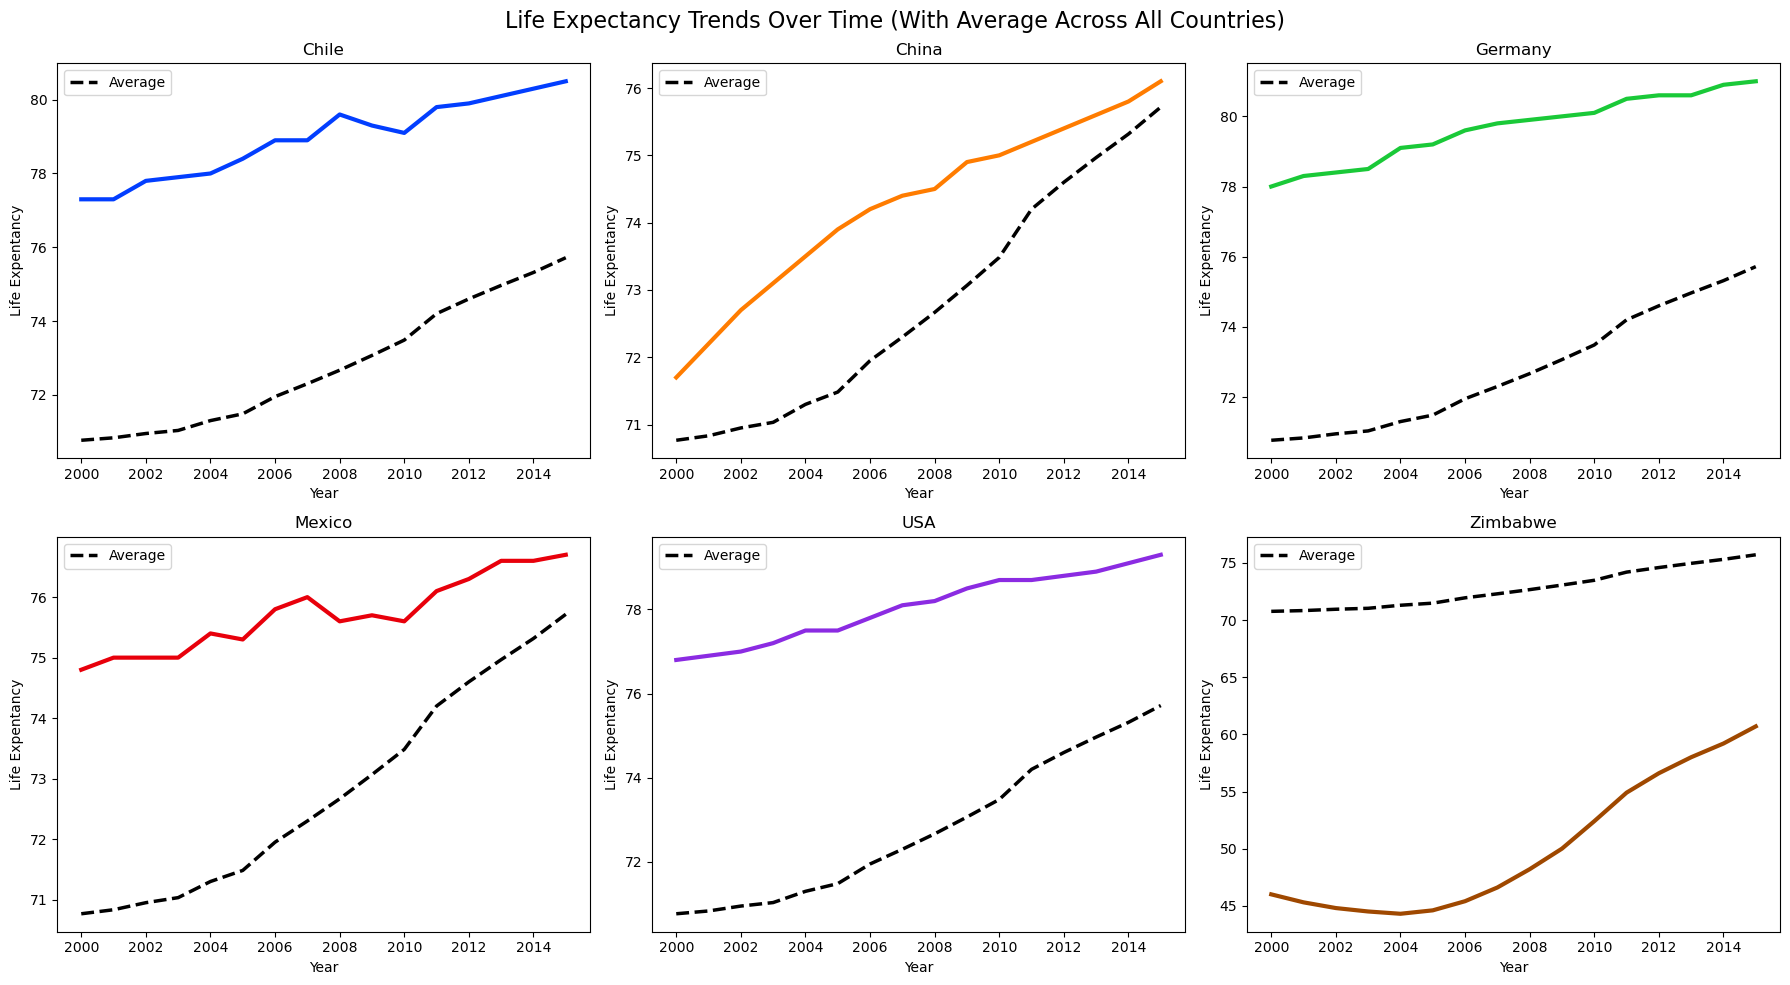

In [11]:
unique_countries = df["Country"].unique()
colors = sns.color_palette("bright", len(unique_countries))


fig, axes = plt.subplots(2, 3, figsize = (18, 10)) 
axes = axes.flatten() 

for i, country in enumerate(unique_countries):
    ax = axes[i]
    sns.lineplot(x = "Year",
                 y = "LE",
                 data = df[df["Country"] == country],
                 color = colors[i],
                 linewidth = 3,
                 ax = ax)
    sns.lineplot(x = "Year", 
                 y ="LE", 
                 data = mean_life, 
                 color = "black", 
                 label = "Average", 
                 linewidth = 2.5, 
                 linestyle = "--", 
                 ax = ax)
    ax.set_title(country)
    ax.set_xlabel("Year")
    ax.set_ylabel("Life Expentancy")

fig.suptitle("Life Expectancy Trends Over Time (With Average Across All Countries)", fontsize=16)
plt.tight_layout()
plt.show()

GDP Trends by Country and Comparison with Average
This visualization contains two plots for each country:

The left plot shows the GDP trend for each individual country over time.

The right plot shows the same country's GDP trend overlaid with the average global GDP trend (black dashed line).

Key Observations:

- Most countries experienced a steady increase in GDP, indicating economic growth over time.

- Some countries (e.g., Mexico, Germany, and Chile) show a slight decline in the final years.

- The black dashed line serves as a benchmark, helping to assess whether a country's performance is above or below the global average.

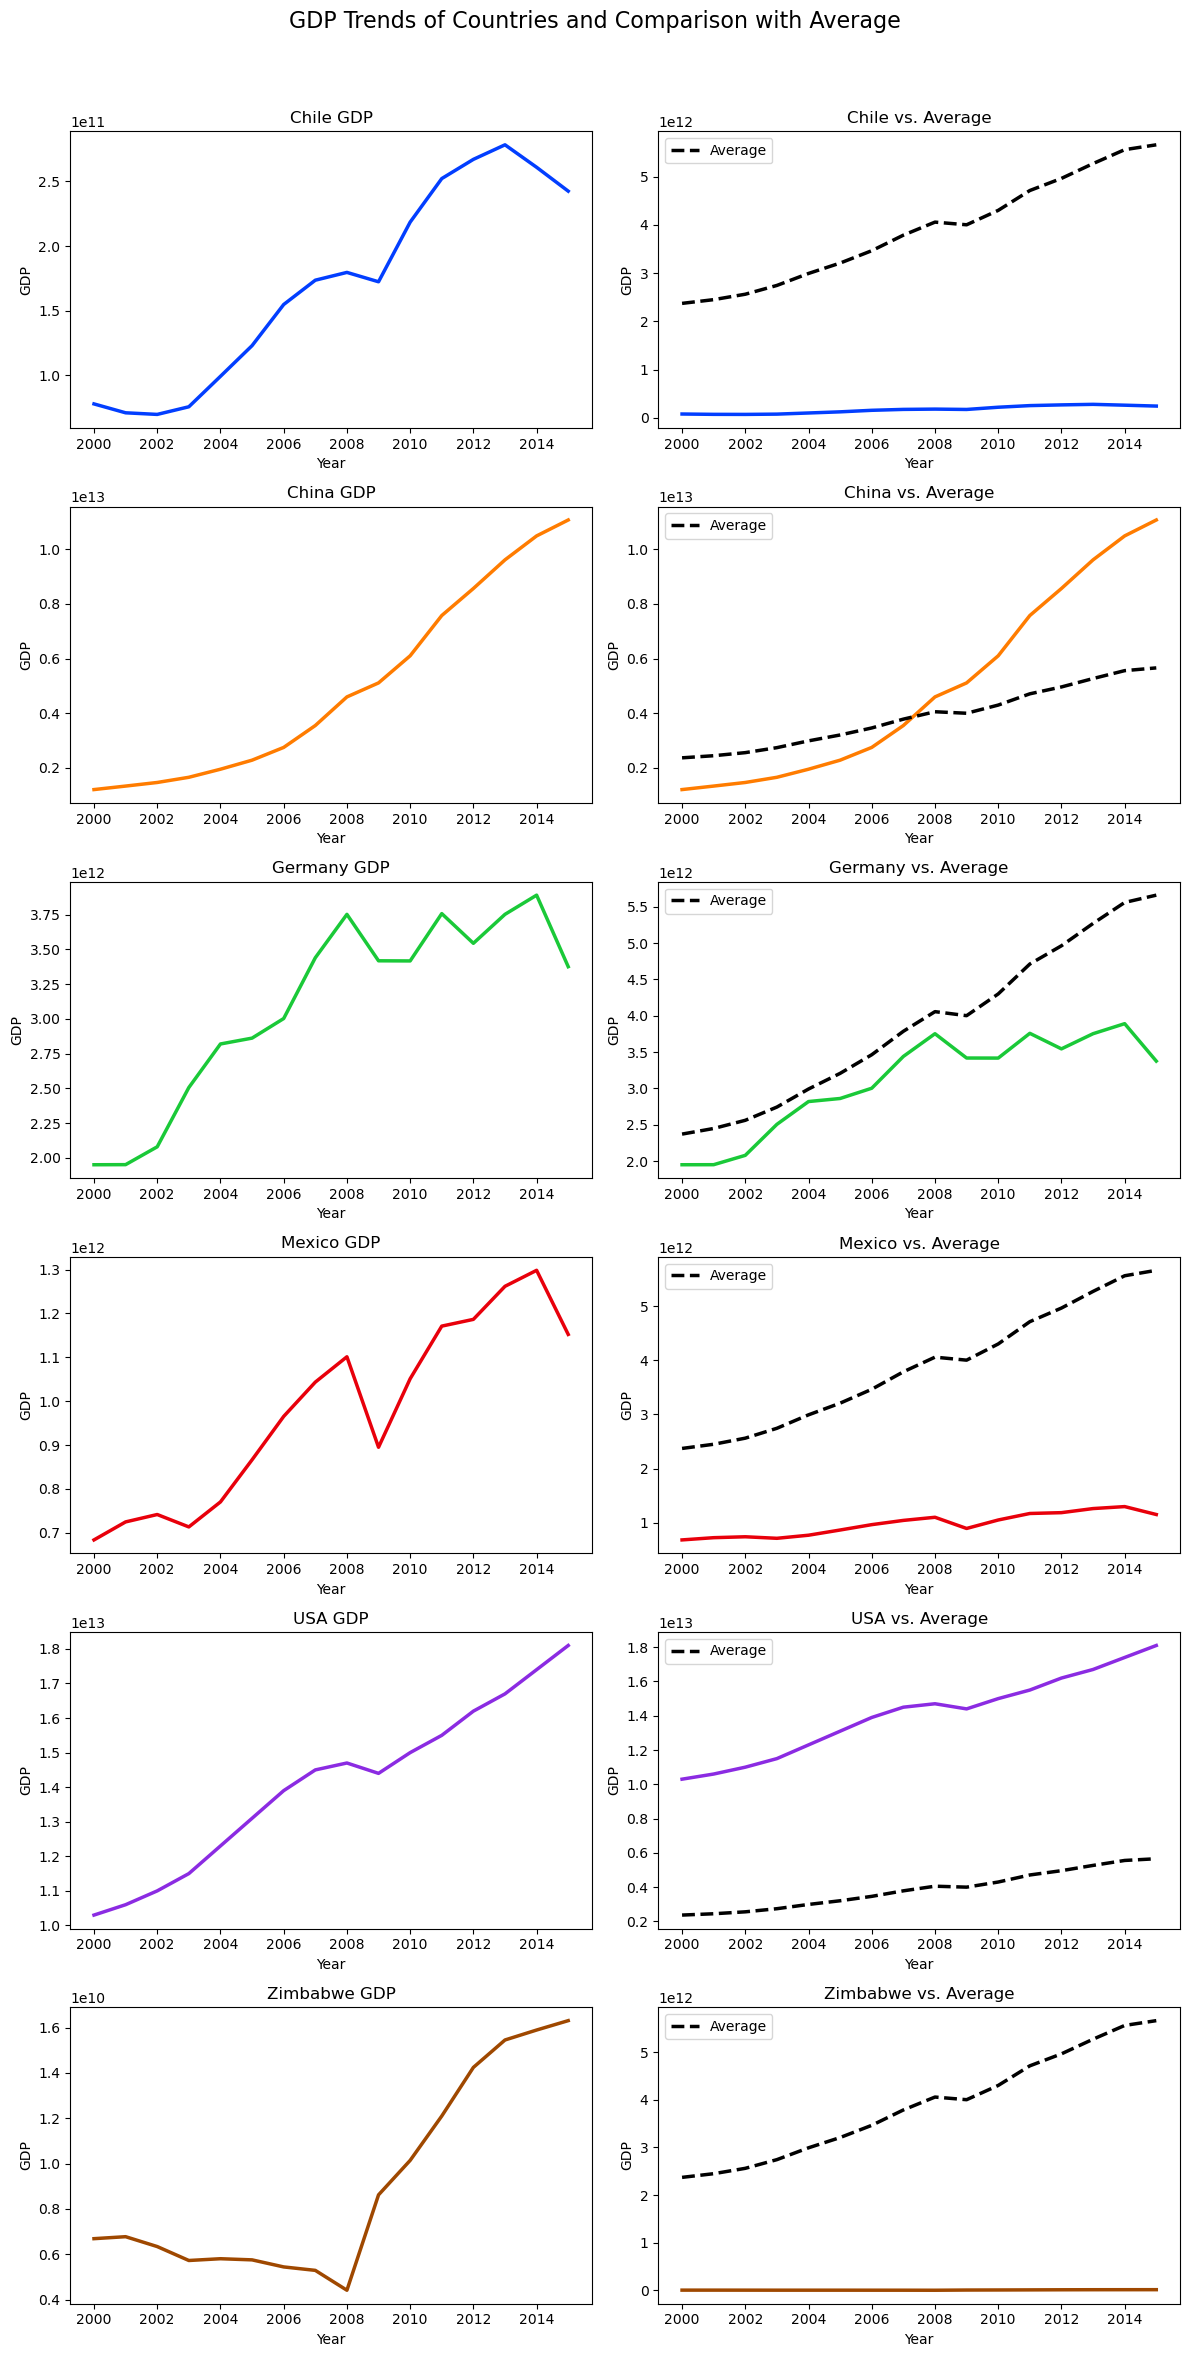

In [12]:
fig, axes = plt.subplots(len(unique_countries), 2, figsize = (12, 4 * len(unique_countries)))

for i, country in enumerate(unique_countries):
    sns.lineplot(x = "Year",
        y = "GDP",
        data = df[df["Country"] == country],
        ax = axes[i, 0],
        color = colors[i],
        linewidth = 2.5)
    axes[i, 0].set_title(f"{country} GDP")
    axes[i, 0].set_xlabel("Year")
    axes[i, 0].set_ylabel("GDP")

    sns.lineplot(x = "Year",
        y = "GDP",
        data = df[df["Country"] == country],
        ax = axes[i, 1],
        color = colors[i],
        linewidth = 2.5)
    sns.lineplot(x = "Year",
        y = "GDP",
        data = mean_GDP,
        ax = axes[i, 1],
        color = "black",
        linestyle = "--",
        linewidth = 2.5,
        label = "Average")
    axes[i, 1].set_title(f"{country} vs. Average")
    axes[i, 1].set_xlabel("Year")
    axes[i, 1].set_ylabel("GDP")

fig.suptitle("GDP Trends of Countries and Comparison with Average", fontsize = 16)
plt.tight_layout(rect = [0, 0, 1, 0.96]) 
plt.show()

Relationship Between GDP and Life Expectancy by Country
This series of scatter plots displays the relationship between GDP and Life Expectancy for each country in the dataset.

Each point represents a specific year’s data for that country.

The black trend line is drawn using a lowess regression, which helps identify the general pattern in the data without assuming a linear relationship.

Insights:

-In most countries, there's a positive association between GDP and Life Expectancy — as GDP increases, people tend to live longer.

-The strength and pattern of this relationship varies from country to country.

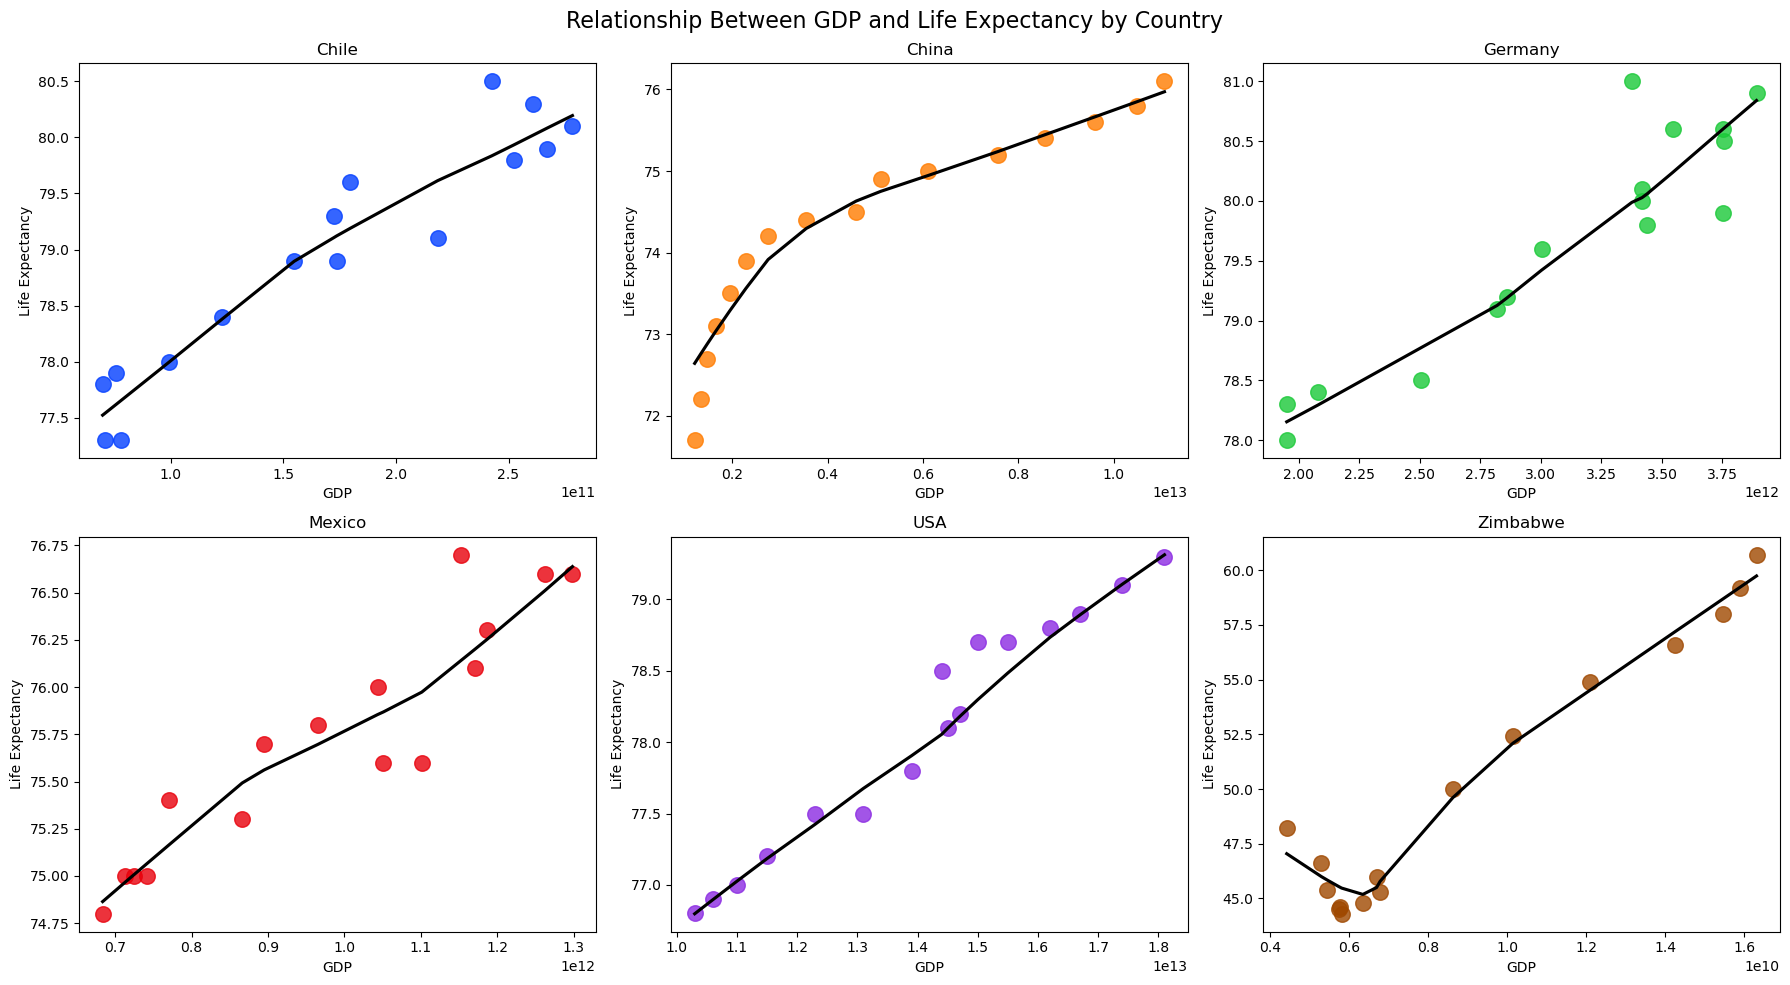

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10)) 
axes = axes.flatten() 

for i, country in enumerate(unique_countries):
    ax = axes[i]
    sns.regplot(x = "GDP", y = "LE", data = df[df["Country"] == country], scatter_kws = {"color": colors[i], "s": 125}, line_kws = {"color": "black"}, lowess = True, ax = ax)
    ax.set_title(country)
    ax.set_xlabel("GDP")
    ax.set_ylabel("Life Expectancy")
fig.suptitle("Relationship Between GDP and Life Expectancy by Country", fontsize=16)
plt.tight_layout()
plt.show()

# Conclusions
This project, despite using a relatively small dataset (only 96 rows and 4 columns), was able to generate several meaningful visualizations and insights.

We aimed to answer the following key questions:

- Has life expectancy increased over time in the six nations?

  - Yes, life expectancy has increased in all six countries. The most significant growth was observed in Zimbabwe, which started from a very low value and showed steady improvement over the years.

- Has GDP increased over time in the six nations?

  - Yes, GDP generally increased over time in all six nations. However, several countries—including Chile, Germany, and Mexico—experienced a decline in GDP in the most recent year, suggesting short-term economic fluctuations despite long-term growth trends.

  - A noticeable dip appears around 2008 across multiple countries, reflecting the impact of the global financial crisis. This economic shock is visible as a break or slowdown in GDP growth on the plots, demonstrating how worldwide events can significantly influence national economies.

  - Zimbabwe's GDP, which had been declining before 2008, began to show significant growth in the years that followed, suggesting a period of recovery and economic reform. Meanwhile, China maintained a strong upward trajectory throughout the entire period, with especially rapid GDP growth.

- Is there a correlation between GDP and life expectancy of a country?

  - The regression lines show a clear and positive correlation between GDP and life expectancy across different countries. This suggests that as a country's economic output increases, people tend to live longer, possibly due to improved healthcare services, better education, and enhanced living conditions.

  - Although the strength of this correlation varies by country, the overall trend supports the idea that economic development is closely linked to public health and quality of life. For instance, countries like Zimbabwe show a steeper slope, indicating a stronger impact of GDP growth on life expectancy. Meanwhile, more economically developed nations exhibit a more stable but still positive relationship, as their life expectancy is already relatively high.

- What is the average life expectancy in these nations?

  - Most countries have an average life expectancy in the mid to high 70s, except for Zimbabwe, which had a much lower average of around 50 years.

- What is the distribution of that life expectancy?

  - The distribution of life expectancy is left-skewed, meaning most of the values are on the higher end (right side) with fewer low values, primarily due to Zimbabwe's lower numbers.